In [8]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

### Solar

In [241]:
T  = 24 * 365
def sunset_sunrise(h):
    sunset = 1.5 * np.cos(2*np.pi * h / T + np.pi) + 18.5
    sunrise = 1.5 * np.cos(2*np.pi * h / T) + 5.5
    return sunset, sunrise

def year_pattern(h):
    return 0.25 * np.cos(2*np.pi * h / T + np.pi) + 0.75

def bell(h, sunrise, sunset):
    daily_h = h % 24
    y = norm.pdf(daily_h, loc=12, scale=2.) / norm.pdf(0, scale=2.)
    
    y[daily_h < sunrise] = 0
    y[daily_h > sunset] = 0
    
    return y

def create_day_base_curve(h_since_solstice, delta_t, p_max):
    daily_h = h_since_solstice % 24
    
    sunset, sunrise = sunset_sunrise(h_since_solstice)
    yearly_pattern = year_pattern(h_since_solstice)
    b = bell(np.arange(0, 24, delta_t / 60), sunrise, sunset)
    
    curve = p_max * (b + np.random.normal(loc=0., scale=.05, size=b.size))
    curve = clip_production(curve, delta_t, sunrise, sunset)    
    
    return curve, sunrise, sunset

def clip_production(p, delta_t, sunrise, sunset):
    
    p_arr = np.array(p)
    p_arr[p_arr < 0] = 0
    p_arr[np.arange(0, 24, delta_t / 60) < sunrise] = 0
    p_arr[np.arange(0, 24, delta_t / 60) > sunset] = 0
    
    return p

def follow_curve(day, delta_t, p_max):
    t = np.arange(0, 24, delta_t / 60) + day * 24 + 240
    base, sunrise, sunset = create_day_base_curve(t, delta_t, p_max)
    
    day_generation = [base[0]]
    for i in range(1, 24):
        diff = base[i] - day_generation[-1]
        noise = np.random.normal(loc=diff, scale=0.01)
        day_generation.append(day_generation[-1] + noise)

    day_generation = clip_production(day_generation, delta_t, sunrise, sunset)
        
    for i in range(24):
        yield day_generation[i]

In [223]:
time = np.arange(0, 24*365) + 240

#### Sunset sunrise curves

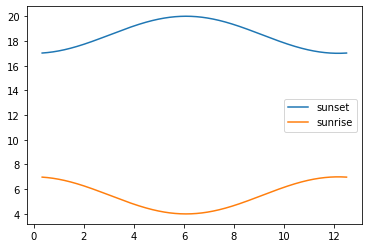

In [153]:
sunset, sunrise = sunset_sunrise(time)
pattern = year_pattern(time)

plt.plot(time / (24*30), sunset, label='sunset')
plt.plot(time / (24*30), sunrise, label='sunrise')
plt.legend()

#### Yearly pattern

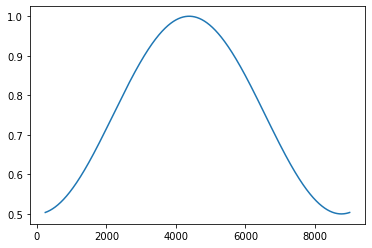

In [154]:
plt.plot(time, pattern)

#### Bell curve

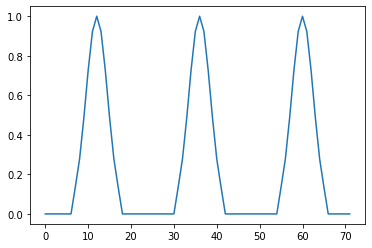

In [155]:
day_time = np.arange(0, 24 * 3)
b = bell(day_time, sunrise[0], sunset[0])

plt.plot(day_time, b)

#### Build base curve for a day

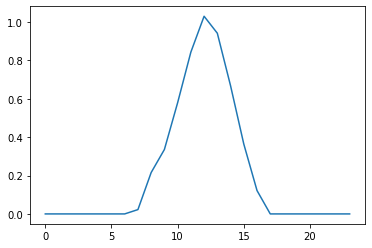

In [183]:
day_curve, sunrise, sunset = create_day_base_curve(1, 1)
plt.plot(day_curve)

#### Generate new curves following the base curve

In [242]:
gen = follow_curve(0, 15, 1)
curve = []
for i in range(24):
    curve.append(next(gen))

IndexError: boolean index did not match indexed array along dimension 0; dimension is 24 but corresponding boolean dimension is 96

In [ ]:
plt.plot(curve)

In [245]:
import datetime

In [246]:
a = datetime.datetime(2019, 1, 2)

In [248]:
a.day - datetime.datetime(2019, 1, 1)

TypeError: unsupported operand type(s) for -: 'int' and 'datetime.datetime'

In [250]:
a = np.array([1, 2, 3])
b = np.array(a)
c = a

In [251]:
a[1] = 0
print(b, c)

[1 2 3] [1 0 3]
